In [1]:
## Pkg.add("LibSndFile")   # 初回のみ

using LibSndFile       # 音ファイルの読み書きに使う
using SampledSignals   # オーディオサンプルの定義
using PyPlot           # グラフ描画に使う

In [2]:
x = load("gershwin_piano_concerto.wav")

587264-frame, 2-channel SampleBuf{FixedPointNumbers.Fixed{Int16,15}, 2}
13.316643990929705s sampled at 44100.0Hz
▅▆▆▆▆▇▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▆▆▇▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▆▇▇▇▇▇▇▇▇▇▇▇▆▇▆▆▇▆▆▆▆▅▄
▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▆▇▇▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▆▆▆▆▆▆▆▅▄

In [3]:
x.samplerate   # サンプリング周波数

44100.0

In [4]:
x.data

587264×2 Array{FixedPointNumbers.Fixed{Int16,15},2}:
 -3.0e-5Q0f15    0.0Q0f15    
  0.0Q0f15       3.0e-5Q0f15 
 -3.0e-5Q0f15    3.0e-5Q0f15 
 -3.0e-5Q0f15    3.0e-5Q0f15 
 -3.0e-5Q0f15    6.0e-5Q0f15 
 -6.0e-5Q0f15    3.0e-5Q0f15 
 -3.0e-5Q0f15    3.0e-5Q0f15 
 -3.0e-5Q0f15   -3.0e-5Q0f15 
  0.0Q0f15      -6.0e-5Q0f15 
  0.0Q0f15      -6.0e-5Q0f15 
 -6.0e-5Q0f15   -3.0e-5Q0f15 
 -6.0e-5Q0f15   -6.0e-5Q0f15 
 -9.0e-5Q0f15    0.0Q0f15    
 -9.0e-5Q0f15    3.0e-5Q0f15 
 -0.00015Q0f15   6.0e-5Q0f15 
 -0.00012Q0f15   6.0e-5Q0f15 
 -9.0e-5Q0f15    0.0Q0f15    
 -6.0e-5Q0f15    3.0e-5Q0f15 
 -6.0e-5Q0f15    0.0Q0f15    
 -6.0e-5Q0f15    3.0e-5Q0f15 
 -3.0e-5Q0f15    3.0e-5Q0f15 
 -6.0e-5Q0f15    9.0e-5Q0f15 
  ⋮                          
 -0.00015Q0f15  -6.0e-5Q0f15 
 -9.0e-5Q0f15   -0.00012Q0f15
  0.0Q0f15      -0.00015Q0f15
  0.0Q0f15      -9.0e-5Q0f15 
  0.0Q0f15      -3.0e-5Q0f15 
  0.0Q0f15       0.0Q0f15    
  0.0Q0f15       0.0Q0f15    
  3.0e-5Q0f15    0.0Q0f15    
  3.0e-5Q0f15    

In [5]:
x[1:44100, :]

44100-frame, 2-channel SampleBuf{FixedPointNumbers.Fixed{Int16,15}, 2}
1.0s sampled at 44100.0Hz
▂▃▃▄▄▄▄▄▅▄▅▅▅▅▅▅▅▅▅▅▅▅▅▅▆▅▆▆▆▆▆▅▆▆▆▆▆▆▆▆▆▅▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▇▆▆
▂▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▅▅▅▅▅▅▅▅▆▅▅▅▅▆▅▅▆▆▆▆▆▆▅▅▅▅▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆

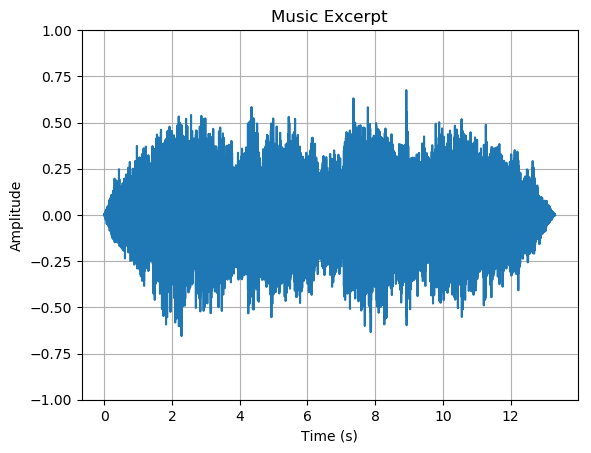

In [6]:
x1 = x.data[:, 1];   # チャンネル1のみ抜き出し
t = (0 : length(x1)-1) / x.samplerate;
plot(t, x1);
ylim(-1, +1);
grid();
title("Music Excerpt");
xlabel("Time (s)");
ylabel("Amplitude");
#savefig("output.png")

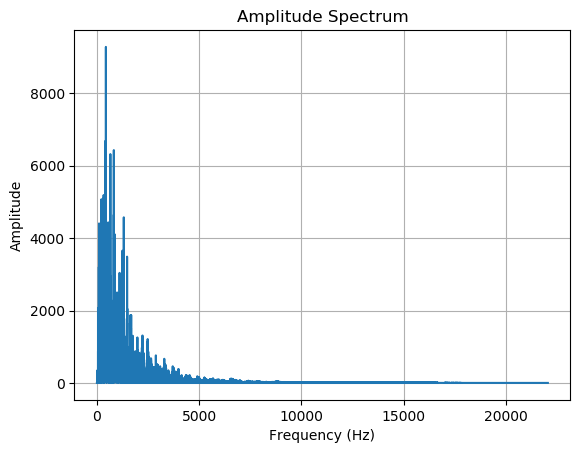

In [7]:
X1 = abs.(fft(x1));
X2 = X1[1 : Int(length(X1)/2) + 1];
X2[2:end-1] = X2[2:end-1] * 2.0;
f = linspace(0, x.samplerate/2, length(X2));
plot(f, X2);
grid();
title("Amplitude Spectrum");
xlabel("Frequency (Hz)");
ylabel("Amplitude");
#savefig("output2.png");

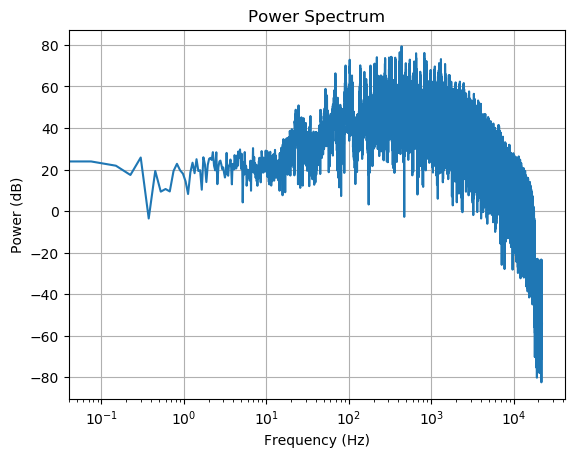

In [8]:
semilogx(f, 10*log10.(X2.^2));
grid();
title("Power Spectrum");
xlabel("Frequency (Hz)");
ylabel("Power (dB)");

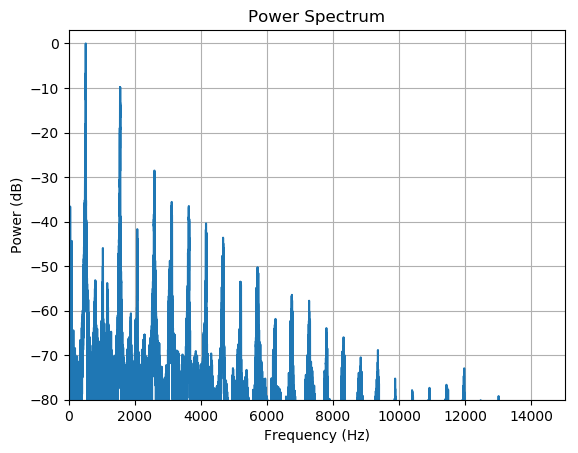

In [9]:
y = load("recorder.flac");
fs = y.samplerate;
y1 = y[1:Int(fs*1.8)];
y2 = zeros(nextpow(2, length(y1)));
y2[1:length(y1)] = y1;
Y2 = abs.(fft(y2));
Y2 = Y2 / length(y2);
Y2 = Y2 .^ 2;
Y3 = Y2[1 : Int(length(Y2)/2) + 1];
Y3[2:end-1] = Y3[2:end-1] * 2.0;
Y4 = 10*log10.(Y3);

f = linspace(0, y.samplerate/2, length(Y3));
plot(f, Y4-maximum(Y4));
xlim(0, 15000);
ylim(-80, +3);
grid();
title("Power Spectrum");
xlabel("Frequency (Hz)");
ylabel("Power (dB)");
#savefig("output3.png");

In [10]:
# writing sound file
whitenoise = rand(44100, 4) - 0.5;
testbuf = SampleBuf(whitenoise, x.samplerate);
save("hoge.wav", testbuf);

# FLAC requires samples to be PCM16Sample
arr = map(PCM16Sample, whitenoise);
testbuf = SampleBuf(arr, x.samplerate);
save("hoge.flac", testbuf);